# Обробка та аналіз БМД Лабораторна 7 Бондарчук Євгеній БС-82

# Завдання

1. Обрати реальні дані з kaggle або сгенерувати випадкові дані. Дані мають відповідати вимогам викладеним вище. 

2. Побудувати графік, що відображає розкид даних в групах. Приклад:
![alt text](https://s3.amazonaws.com/libapps/accounts/2515/images/spss_paired-t_example_boxplot.PNG)

3. Написати функції:
* для оцінки вімінностей дисперсій між групами за критерієм Лівеня. Функція має повертати значення тесту  та результат оцінки рівності дисперсій (significant або not significant).

* для визначення відмінності між групами за критерієм Стьюдента в залежності від рівності/відмінності дисперсій. Функція має повертати значення критерію Стьюдента,значення ступеня свободи та результат оцінки значимості зв'зку (significant або not significant). 

4. Перевірити розбіжність на між групами на даних з п. 1. 



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from numpy.random import randint
from math import sqrt

1. Обрати реальні дані з kaggle або сгенерувати випадкові дані. Дані мають відповідати вимогам викладеним вище.

In [2]:
data_1 = randint(0, 20, 7)
data_2 = randint(0, 20, 7)
data = pd.DataFrame({"01.03.2020": data_1, "01.04.2020": data_2,}, index = ["Porsche","Audi", "Mercedes","BMW", "Volkswagen", "Seat", "Toyota"])
data.index.name = 'Марка авто'
data.columns.name = 'Кількість проданих авто'
N = data.shape[0]
data

Кількість проданих авто,01.03.2020,01.04.2020
Марка авто,,
Porsche,1,3
Audi,12,5
Mercedes,0,5
BMW,16,7
Volkswagen,16,0
Seat,2,1
Toyota,9,7


2. Побудувати графік, що відображає розкид даних в групах.

[]

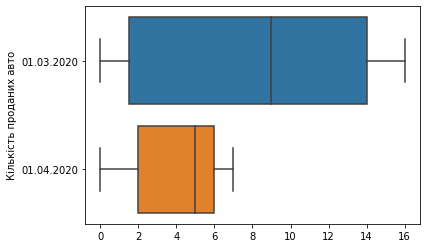

In [3]:
sns.boxplot(data = data, orient = 'h').set()

3. Написати функції:
- для оцінки вімінностей дисперсій між групами за критерієм Лівеня. Функція має повертати значення тесту та результат оцінки рівності дисперсій (significant або not significant).
- для визначення відмінності між групами за критерієм Стьюдента в залежності від рівності/відмінності дисперсій. Функція має повертати значення критерію Стьюдента,значення ступеня свободи та результат оцінки значимості зв'зку (significant або not significant).

In [4]:
def get_sigma(array):
    mean = sum(array)/N
    summa = 0
    for i in range(N):
        summa += (array[i] - mean)**2
    return summa/(N - 1)

def Liven(data):
    sig1 = get_sigma(data["01.03.2020"])
    sig2 = get_sigma(data["01.04.2020"])
    
    if(sig1>sig2):
        F = sig1/sig2
    else:
        F = sig2/sig1
    print('Отримане значення критерію Лівеня : F = ' + str(F))
    df = df1 = df2 = N - 1
    if df1 > 15:
        df1 = '>15'
        
    if df2 > 20:
        df2 = '>20'
    print('Значення ступенів свободи: df = ' + str(df))
    critical_table = pd.read_excel("Таблиця критичних значень для критерію Лівеня.xlsx",index_col=0)
    critical_table = critical_table[df1][df2]
    print("Критичне значення критерію Лівеня = " + str(critical_table))
    result = ("significant") if F < critical_table else "not significant"
    print("Результат оцінки значимості зв'зку: " + result)
    return F, result
result = Liven(data)[1]

Отримане значення критерію Лівеня : F = 6.391304347826087
Значення ступенів свободи: df = 6


KeyError: 6